# 폭염데이터를 이용한 분석

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rc("font", family = "Malgun Gothic")
plt.rc("axes", unicode_minus = False)
plt.style.use('ggplot')

df_2021_06 = pd.read_csv("2021_06.xls", encoding = 'cp949', sep = '\t')
df_2021_07 = pd.read_csv("2021_07.xls", encoding = 'cp949', sep = '\t')
df_2021_08 = pd.read_csv("2021_08.xls", encoding = 'cp949', sep = '\t')
df_2021_09 = pd.read_csv("2021_09.xls", encoding = 'cp949', sep = '\t')

,일시,지점,폭염여부(O/X),최고체감온도(°C),최고기온(°C),평균기온(°C),최저기온(°C),평균상대습도(%),폭염특보(O/X),폭염영향예보(단계),열대야(O/X),자외선지수(단계)
0,2021-06-01,북강릉(104),X,25.1,23.2,17.8,12.5,86.8,X,,X,높음


In [7]:
df = pd.concat([df_2021_06, df_2021_07, df_2021_08, df_2021_09])
df.tail()

,일시,지점,폭염여부(O/X),최고체감온도(°C),최고기온(°C),평균기온(°C),최저기온(°C),평균상대습도(%),폭염특보(O/X),폭염영향예보(단계),열대야(O/X),자외선지수(단계)
4855,2021-09-30,북춘천(93),X,26.5,25.2,18.1,14.6,91.5,X,,X,높음
4856,2021-09-30,하동(932),X,29.4,28.3,22.5,18.2,86.0,X,,X,높음
4857,2021-09-30,철원(95),X,26.6,25.1,17.9,13.9,94.0,X,,X,높음
4858,2021-09-30,동두천(98),X,26.4,24.4,18.2,14.4,91.9,X,,X,높음
4859,2021-09-30,파주(99),X,27.1,25.5,18.3,14.8,93.0,X,,X,높음


In [8]:
print(df_2021_06.shape)
print(df_2021_07.shape)
print(df_2021_08.shape)
print(df_2021_09.shape)

(4860, 12)
(5022, 12)
(5022, 12)
(4860, 12)


## 데이터 전처리

In [9]:
df.shape

(19764, 12)

In [10]:
df.index = range(0, (df.shape[0]), 1)
df.index

RangeIndex(start=0, stop=19764, step=1)

In [11]:
df.tail()

,일시,지점,폭염여부(O/X),최고체감온도(°C),최고기온(°C),평균기온(°C),최저기온(°C),평균상대습도(%),폭염특보(O/X),폭염영향예보(단계),열대야(O/X),자외선지수(단계)
19759,2021-09-30,북춘천(93),X,26.5,25.2,18.1,14.6,91.5,X,,X,높음
19760,2021-09-30,하동(932),X,29.4,28.3,22.5,18.2,86.0,X,,X,높음
19761,2021-09-30,철원(95),X,26.6,25.1,17.9,13.9,94.0,X,,X,높음
19762,2021-09-30,동두천(98),X,26.4,24.4,18.2,14.4,91.9,X,,X,높음
19763,2021-09-30,파주(99),X,27.1,25.5,18.3,14.8,93.0,X,,X,높음


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19764 entries, 0 to 19763
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   일시          19764 non-null  object 
 1   지점          19764 non-null  object 
 2   폭염여부(O/X)   19764 non-null  object 
 3   최고체감온도(°C)  19613 non-null  float64
 4   최고기온(°C)    19682 non-null  float64
 5   평균기온(°C)    19675 non-null  float64
 6   최저기온(°C)    19681 non-null  float64
 7   평균상대습도(%)   19433 non-null  float64
 8   폭염특보(O/X)   19764 non-null  object 
 9   폭염영향예보(단계)  19764 non-null  object 
 10  열대야(O/X)    19764 non-null  object 
 11  자외선지수(단계)   19764 non-null  object 
dtypes: float64(5), object(7)
memory usage: 1.8+ MB


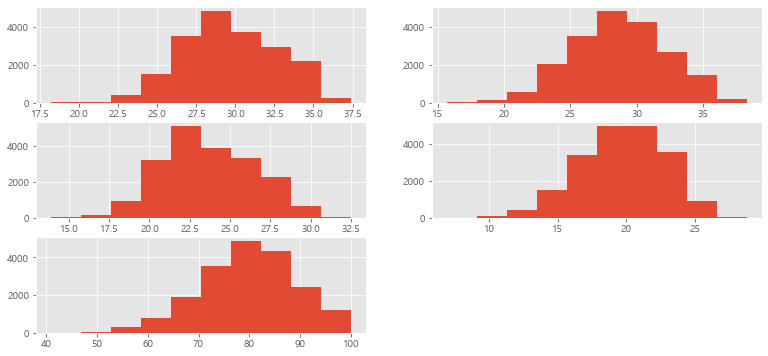

In [13]:
plt.figure(figsize = (13, 6))
for i in  range(0, df.iloc[:, 3:8].shape[1]) :
    plt.subplot(3, 2, (i+1))
    plt.hist(df.iloc[:, i+3])
plt.savefig('opensw_2_1')
plt.show()
#정규분포 형태

In [14]:
for i in  range(0, df.iloc[:, 3:8].shape[1]) :
    print(df.iloc[:, 3:8].columns[i-3],"의 평균:", df.iloc[:, i+3].mean())
    print(df.iloc[:, 3:8].columns[i-3],"의 중앙값:", df.iloc[:, i+3].median())
#평균과 중앙값의 차이가 거의 없음

평균기온(°C) 의 평균: 29.683118339876483
평균기온(°C) 의 중앙값: 29.5
최저기온(°C) 의 평균: 28.652657250279418
최저기온(°C) 의 중앙값: 28.6
평균상대습도(%) 의 평균: 23.658398983481472
평균상대습도(%) 의 중앙값: 23.4
최고체감온도(°C) 의 평균: 19.73995223819928
최고체감온도(°C) 의 중앙값: 19.9
최고기온(°C) 의 평균: 79.94555138167375
최고기온(°C) 의 중앙값: 80.3


In [15]:
#그러므로 각 열의 결측값들은 각 열의 평균으로 채움

In [16]:
df.iloc[:, 3:8] = df.iloc[:, 3:8].fillna(df.iloc[:, 3:8].mean())

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19764 entries, 0 to 19763
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   일시          19764 non-null  object 
 1   지점          19764 non-null  object 
 2   폭염여부(O/X)   19764 non-null  object 
 3   최고체감온도(°C)  19764 non-null  float64
 4   최고기온(°C)    19764 non-null  float64
 5   평균기온(°C)    19764 non-null  float64
 6   최저기온(°C)    19764 non-null  float64
 7   평균상대습도(%)   19764 non-null  float64
 8   폭염특보(O/X)   19764 non-null  object 
 9   폭염영향예보(단계)  19764 non-null  object 
 10  열대야(O/X)    19764 non-null  object 
 11  자외선지수(단계)   19764 non-null  object 
dtypes: float64(5), object(7)
memory usage: 1.8+ MB


In [18]:
#2021-11 index = 0~4859
print(df.loc[df['일시'] == '2021-06-30'].tail(1))
#2021-12 index = 4860~9881
print(df.loc[df['일시'] == '2021-07-31'].tail(1))
#2022-01 index = 9882~14903
print(df.loc[df['일시'] == '2021-08-31'].tail(1))
#2022-02 index = 14904~19763
print(df.loc[df['일시'] == '2021-09-30'].tail(1))

              일시      지점 폭염여부(O/X)  최고체감온도(°C)  최고기온(°C)  평균기온(°C)  최저기온(°C)  \
4859  2021-06-30  파주(99)         X        30.1      28.4      23.0      19.5   

      평균상대습도(%) 폭염특보(O/X) 폭염영향예보(단계) 열대야(O/X) 자외선지수(단계)  
4859       86.8         X                   X        보통  
              일시      지점 폭염여부(O/X)  최고체감온도(°C)  최고기온(°C)  평균기온(°C)  최저기온(°C)  \
9881  2021-07-31  파주(99)         O        33.5      32.8      27.8      24.5   

      평균상대습도(%) 폭염특보(O/X) 폭염영향예보(단계) 열대야(O/X) 자외선지수(단계)  
9881       79.8         O         경고        X        높음  
               일시      지점 폭염여부(O/X)  최고체감온도(°C)  최고기온(°C)  평균기온(°C)  최저기온(°C)  \
14903  2021-08-31  파주(99)         X        25.8      22.3      19.8      17.7   

       평균상대습도(%) 폭염특보(O/X) 폭염영향예보(단계) 열대야(O/X) 자외선지수(단계)  
14903       99.3         X                   X        보통  
               일시      지점 폭염여부(O/X)  최고체감온도(°C)  최고기온(°C)  평균기온(°C)  최저기온(°C)  \
19763  2021-09-30  파주(99)         X        27.1      25.5      18.3      14.8   

  

## 기온

In [19]:
mean_tem_2021_06 = df.iloc[0:4860]['평균기온(°C)'].mean()
mean_tem_2021_07 = df.iloc[4860:9882]['평균기온(°C)'].mean()
mean_tem_2021_08 = df.iloc[9882:14904]['평균기온(°C)'].mean()
mean_tem_2021_09 = df.iloc[14904:19440]['평균기온(°C)'].mean()
mean_tem = mean_tem_2021_06, mean_tem_2021_07, mean_tem_2021_08, mean_tem_2021_09
mean_tem_month = pd.Series(mean_tem, index = ['2021-06', '2021-07', '2021-08', '2021-09'])
min_tem_2021_06 = df.iloc[0:4860]['최저기온(°C)'].mean()
min_tem_2021_07 = df.iloc[4860:9882]['최저기온(°C)'].mean()
min_tem_2021_08 = df.iloc[9882:14904]['최저기온(°C)'].mean()
min_tem_2021_09 = df.iloc[14904:19440]['최저기온(°C)'].mean()
min_tem = min_tem_2021_06, min_tem_2021_07, min_tem_2021_08, min_tem_2021_09
min_tem_month = pd.Series(min_tem, index = ['2021-06', '2021-07', '2021-08', '2021-09'])
max_tem_2021_06 = df.iloc[0:4860]['최고기온(°C)'].mean()
max_tem_2021_07 = df.iloc[4860:9882]['최고기온(°C)'].mean()
max_tem_2021_08 = df.iloc[9882:14904]['최고기온(°C)'].mean()
max_tem_2021_09 = df.iloc[14904:19440]['최고기온(°C)'].mean()
max_tem = max_tem_2021_06, max_tem_2021_07, max_tem_2021_08, max_tem_2021_09
max_tem_month = pd.Series(max_tem, index = ['2021-06', '2021-07', '2021-08', '2021-09'])

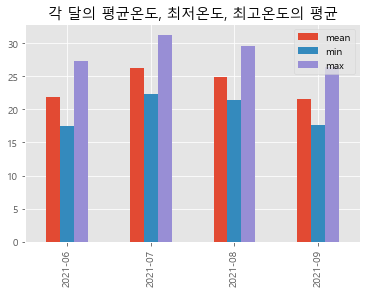

In [20]:
pd.DataFrame({'mean' : mean_tem_month, 'min': min_tem_month, 'max' : max_tem_month}).plot(kind = 'bar')
plt.title('각 달의 평균온도, 최저온도, 최고온도의 평균')
plt.savefig('opensw_2_2',bbox_inches = 'tight')
plt.show()

## 습도
#### 습도와 다른 수치형변수간의 관계

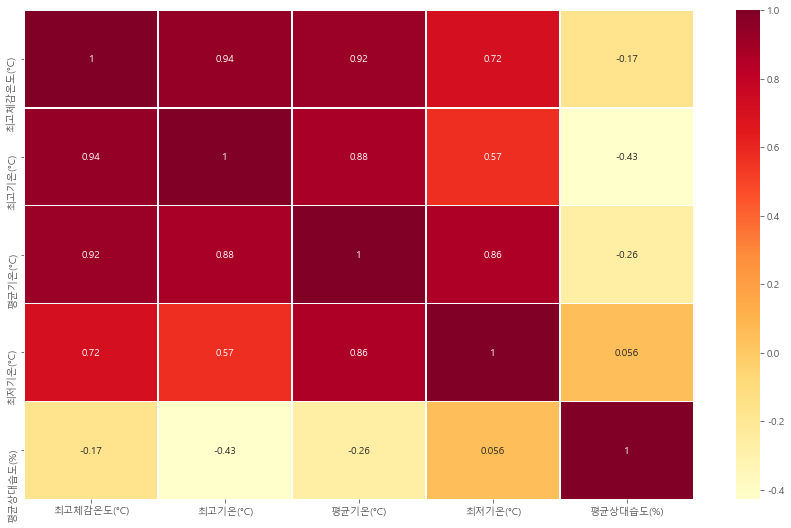

In [21]:
import seaborn as sns
plt.figure(figsize = (15, 9))
heat = df.iloc[:, 3:8].corr()
sns.heatmap(heat, annot = True, linewidths = 0.4, linecolor = 'white', cmap = 'YlOrRd')
plt.savefig('opensw_2_3', bbox_inches = 'tight')

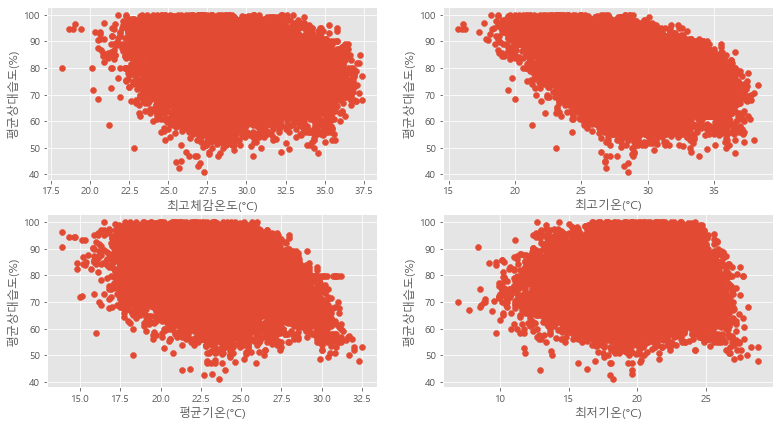

In [22]:
plt.figure(figsize = (13, 7))
for i in range(3, 7) :
    plt.subplot(2, 2, i-2)
    plt.scatter(df.iloc[:, i], df['평균상대습도(%)'])
    plt.xlabel(df.iloc[:, 3:7].columns[i-3])
    plt.ylabel('평균상대습도(%)')
plt.savefig('opensw_2_4', bbox_inches = 'tight')
plt.show()

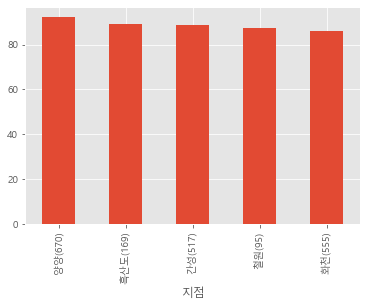

In [23]:
df.groupby('지점').mean()['평균상대습도(%)'].sort_values(ascending = False).head().plot(kind = 'bar')
plt.savefig('opensw_2_5', bbox_inches = 'tight')

In [57]:
hum = df.groupby('지점').mean()['평균상대습도(%)'].sort_values(ascending = False).head()
list(hum.index)

['양양(670)', '흑산도(169)', '간성(517)', '철원(95)', '화천(555)']

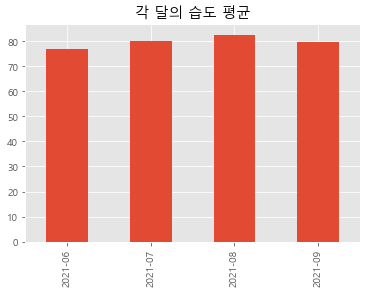

In [66]:
mean_hum_2021_06 = df.iloc[0:4860]['평균상대습도(%)'].mean()
mean_hum_2021_07 = df.iloc[4860:9882]['평균상대습도(%)'].mean()
mean_hum_2021_08 = df.iloc[9882:14904]['평균상대습도(%)'].mean()
mean_hum_2021_09 = df.iloc[14904:19440]['평균상대습도(%)'].mean()
mean_hum = mean_hum_2021_06, mean_hum_2021_07, mean_hum_2021_08, mean_hum_2021_09
mean_hum_month = pd.Series(mean_hum, index = ['2021-06', '2021-07', '2021-08', '2021-09'])
mean_hum_month.plot(kind = 'bar')
plt.title('각 달의 습도 평균')
plt.savefig('opensw_2_6', bbox_inches = 'tight')

## 평균적으로 가장 더운 지역
### 평균적으로 가장 더운 지역에 폭염여부 정도는?

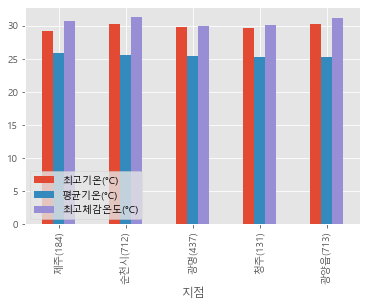

In [25]:
#가장 추운곳과 달리 전부 다 남쪽에 위치하지는 않음
df_hottest = df.groupby('지점').mean()[['최고기온(°C)', '평균기온(°C)', '최고체감온도(°C)']].sort_values('평균기온(°C)', ascending = False)
df_hottest.head(5).plot(kind = 'bar')
plt.legend(loc = 3)
plt.savefig('opensw_2_7', bbox_inches = 'tight')

In [104]:
heatwave_O = df[df['폭염여부(O/X)'] == "O"]['지점'].value_counts()
heatwave_O

담양(706)     50
구례(709)     41
순천시(712)    40
양산시(257)    36
광양읍(713)    36
            ..
여수(168)      6
인천(112)      6
북강릉(104)     4
동해(106)      2
울진(130)      1
Name: 지점, Length: 158, dtype: int64

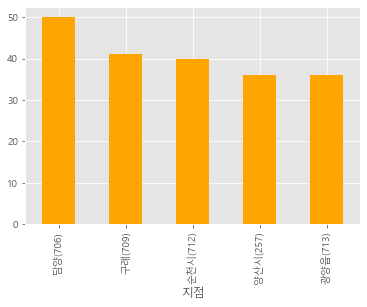

In [105]:
heatwave_O.head().plot(kind = 'bar', color = "orange")
plt.xlabel('지점')
plt.savefig('opensw_2_8', bbox_inches = 'tight')

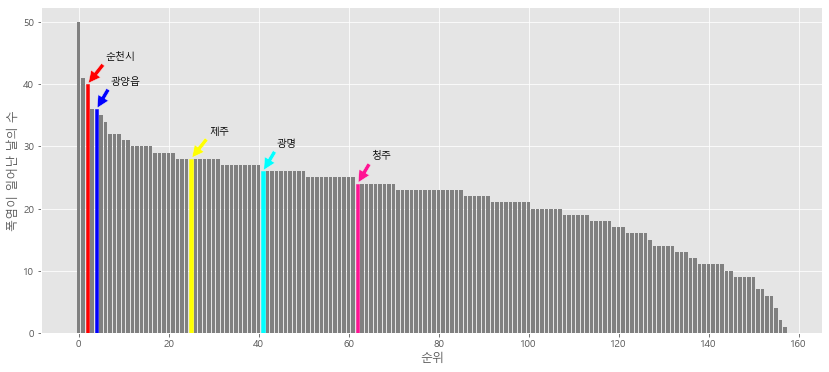

In [107]:
#가장 더운 지역에 폭염여부가 가장 많았을까?
import numpy as np
bar_index = np.arange(len(heatwave_O.index))
plt.figure(figsize = (14, 6))
bar_list = plt.bar(bar_index, heatwave_O.values, color = 'gray')
bar_list[list(heatwave_O.index).index('광양읍(713)')].set_color('blue')
bar_list[list(heatwave_O.index).index('순천시(712)')].set_color('red')
bar_list[list(heatwave_O.index).index('제주(184)')].set_color('yellow')
bar_list[list(heatwave_O.index).index('광명(437)')].set_color('aqua')
bar_list[list(heatwave_O.index).index('청주(131)')].set_color('deeppink')
plt.annotate('순천시', xy = (2, 40), xytext = (6, 44), arrowprops = dict(facecolor = 'red', shrink = 0.05))
plt.annotate('광양읍', xy = (4, 36), xytext = (7, 40), arrowprops = dict(facecolor = 'blue', shrink = 0.05))
plt.annotate('제주', xy = (25, 28), xytext = (29, 32), arrowprops = dict(facecolor = 'yellow', shrink = 0.05))
plt.annotate('광명', xy = (41, 26), xytext = (44, 30), arrowprops = dict(facecolor = 'aqua', shrink = 0.05))
plt.annotate('청주', xy = (62, 24), xytext = (65, 28), arrowprops = dict(facecolor = 'deeppink', shrink = 0.05))
plt.ylabel('폭염이 일어난 날의 수')
plt.xlabel('순위')
plt.savefig('opensw_2_9', bbox_inches = 'tight')

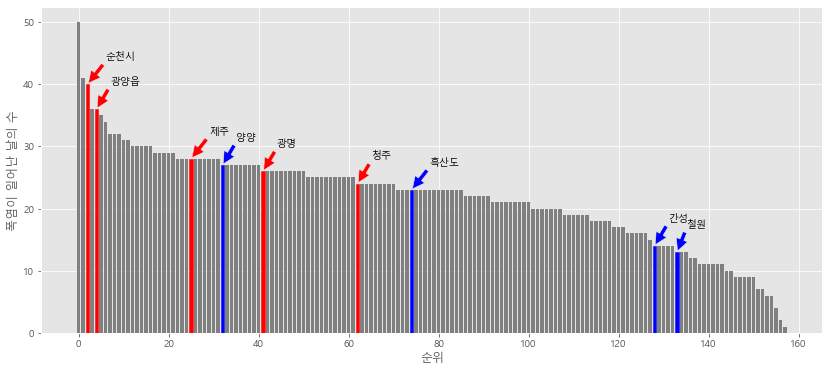

In [102]:
bar_index = np.arange(len(heatwave_O.index))
plt.figure(figsize = (14, 6))
bar_list = plt.bar(bar_index, heatwave_O.values, color = 'gray')
bar_list[list(heatwave_O.index).index('광양읍(713)')].set_color('red')
bar_list[list(heatwave_O.index).index('순천시(712)')].set_color('red')
bar_list[list(heatwave_O.index).index('제주(184)')].set_color('red')
bar_list[list(heatwave_O.index).index('광명(437)')].set_color('red')
bar_list[list(heatwave_O.index).index('청주(131)')].set_color('red')
bar_list[list(heatwave_O.index).index('양양(670)')].set_color('blue')
bar_list[list(heatwave_O.index).index('흑산도(169)')].set_color('blue')
bar_list[list(heatwave_O.index).index('간성(517)')].set_color('blue')
bar_list[list(heatwave_O.index).index('철원(95)')].set_color('blue')
plt.annotate('순천시', xy = (2, 40), xytext = (6, 44), arrowprops = dict(facecolor = 'red', shrink = 0.05))
plt.annotate('광양읍', xy = (4, 36), xytext = (7, 40), arrowprops = dict(facecolor = 'red', shrink = 0.05))
plt.annotate('제주', xy = (25, 28), xytext = (29, 32), arrowprops = dict(facecolor = 'red', shrink = 0.05))
plt.annotate('광명', xy = (41, 26), xytext = (44, 30), arrowprops = dict(facecolor = 'red', shrink = 0.05))
plt.annotate('청주', xy = (62, 24), xytext = (65, 28), arrowprops = dict(facecolor = 'red', shrink = 0.05))
plt.annotate('양양', xy = (32, 27), xytext = (35, 31), arrowprops = dict(facecolor = 'blue', shrink = 0.05))
plt.annotate('흑산도', xy = (74, 23), xytext = (78, 27), arrowprops = dict(facecolor = 'blue', shrink = 0.05))
plt.annotate('간성', xy = (128, 14), xytext = (131, 18), arrowprops = dict(facecolor = 'blue', shrink = 0.05))
plt.annotate('철원', xy = (133, 13), xytext = (135, 17), arrowprops = dict(facecolor = 'blue', shrink = 0.05))
plt.ylabel('폭염이 일어난 날의 수')
plt.xlabel('순위')
plt.savefig('opensw_2_13', bbox_inches = 'tight')

## 폭염
#### 1. 폭염여보가 가장 많이 일어난 달 찾기
#### 2. 폭염영향예보 단계에 따른 수치형데이터의 특징
#### 3. 폭염여부에 따른 수치형데이터의 특징

In [29]:
df['폭염여부(O/X)'].value_counts()

X    16312
O     3452
Name: 폭염여부(O/X), dtype: int64

In [30]:
heatwave_2021_06 = df.iloc[0:4860]['폭염여부(O/X)'].value_counts()
heatwave_2021_07 = df.iloc[4860:9882]['폭염여부(O/X)'].value_counts()
heatwave_2021_08 = df.iloc[9882:14904]['폭염여부(O/X)'].value_counts()
heatwave_2021_09 = df.iloc[14904:19440]['폭염여부(O/X)'].value_counts()
heatwave = heatwave_2021_06, heatwave_2021_07, heatwave_2021_08, heatwave_2021_09
heatwave_month = pd.Series(heatwave, index = ['2021-06', '2021-07', '2021-08', '2021-09'])

In [31]:
for i in range(0, len(heatwave)) :
    print(heatwave_month.index[i])
    print(heatwave_month[i])

2021-06
X    4858
O       2
Name: 폭염여부(O/X), dtype: int64
2021-07
X    2646
O    2376
Name: 폭염여부(O/X), dtype: int64
2021-08
X    3951
O    1071
Name: 폭염여부(O/X), dtype: int64
2021-09
X    4533
O       3
Name: 폭염여부(O/X), dtype: int64


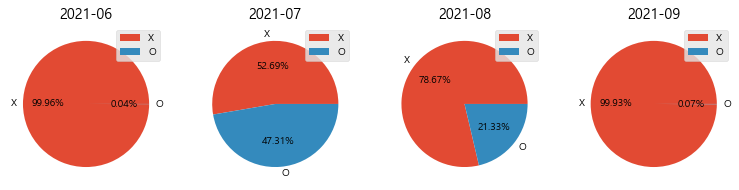

In [32]:
plt.figure(figsize = (13, 6))
for i in range(0, len(heatwave)) :
    plt.subplot(1, 4, (i+1))
    plt.pie(heatwave_month[i], autopct='%.2f%%', labels = heatwave_month[i].index)
    plt.legend(loc = 'best')
    plt.title(heatwave_month.index[i])
plt.savefig('opensw_2_10', bbox_inches = 'tight')
plt.show()

In [33]:
df['폭염특보(O/X)'].value_counts()

X    14367
O     5397
Name: 폭염특보(O/X), dtype: int64

In [34]:
#폭염 영향예보는 폭염 현상으로 인해 예상되는 분야별 영향도를 고려하여 발표하는 예보를 말합니다.

#폭염의 위험수준을 알려주고, 폭염 피해에 대비할수 있도록 보건(일반인) 분야 관심단계 이상이 예상될 때, 전일 오전 11시 30분에 발표하고 있습니다.

In [35]:
df['폭염영향예보(단계)'].value_counts()

      12596
주의     2858
경고     2449
관심     1860
심각        1
Name: 폭염영향예보(단계), dtype: int64

In [36]:
none = df[df['폭염영향예보(단계)'] == ' '].iloc[:, 3:8].mean()
attention = df[df['폭염영향예보(단계)'] == '관심'].iloc[:, 3:8].mean()
caution = df[df['폭염영향예보(단계)'] == '주의'].iloc[:, 3:8].mean()
warning = df[df['폭염영향예보(단계)'] == '경고'].iloc[:, 3:8].mean()
heatwave_step = none, attention, caution, warning
heatwave_step = pd.DataFrame(heatwave_step)

In [37]:
danger = df[df['폭염영향예보(단계)'] == '심각'].iloc[:, 3:8]

In [38]:
heatwave_step.index = [' ', '관심', '주의', '경고']
heatwave_step

,최고체감온도(°C),최고기온(°C),평균기온(°C),최저기온(°C),평균상대습도(%)
,27.952835,26.770576,22.031814,18.240384,80.828678
관심,31.114783,30.243962,24.895377,20.842032,78.860799
주의,32.726677,31.689958,26.490198,22.592302,80.506109
경고,33.941281,33.576551,27.778311,23.286059,75.577584


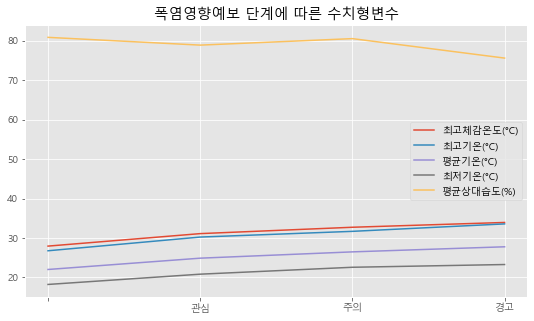

In [39]:
plt.figure(figsize = (9, 5))
plt.plot(heatwave_step)
plt.xticks(heatwave_step.index)
plt.legend(heatwave_step.columns, loc = 'best')
plt.title('폭염영향예보 단계에 따른 수치형변수')
plt.savefig('opensw_2_11', bbox_inches = 'tight')
plt.show()

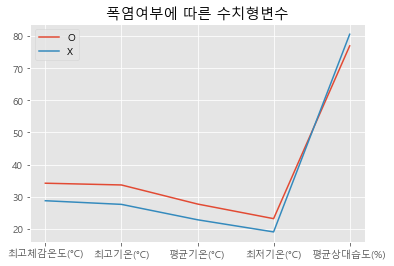

In [47]:
heatwave_O_mean = df[df['폭염여부(O/X)'] == "O"].mean()
heatwave_X_mean = df[df['폭염여부(O/X)'] == "X"].mean()
heatwave_mean = pd.DataFrame([heatwave_O_mean, heatwave_X_mean], index = ['O', 'X'])
heatwave_mean = heatwave_mean.T
plt.plot(heatwave_mean)
plt.legend(loc = 'best', labels = heatwave_mean.columns)
plt.title('폭염여부에 따른 수치형변수')
plt.savefig('opensw_2_12', bbox_inches = 'tight')
plt.show()

In [135]:
import scipy.stats
hum_O = df[df['폭염여부(O/X)'] == "O"]['평균상대습도(%)']
hum_X = df[df['폭염여부(O/X)'] == "X"]['평균상대습도(%)']
print(scipy.stats.ttest_ind(hum_O, hum_X))

Ttest_indResult(statistic=-21.14209715884857, pvalue=3.979565951617551e-98)


In [136]:
print(hum_O.mean())
print(hum_X.mean())

76.95910452552295
80.57755325436945
